In [1]:
import numpy as np
import pandas as pd

In [2]:
#reading the FSim and IC-scored networks as pandas dataframes, scaling the IC score by dviding by 1000
PPI_IC = pd.read_csv('PPI_BP_edgelist_EXP.txt', sep = ' ', names = ['P1', 'P2', 'IC'])
PPI_IC['IC'] = PPI_IC['IC'].div(1000).round(3)
PPI_Fsim = pd.read_csv('FSim_PPI_EXP.txt', sep = '\t', names = ['P1', 'P2', 'FSim'])

In [3]:
PPI_IC.head()

,P1,P2,IC
0,6239.R11A8.4a,6239.AC3.3,0.228
1,6239.R11A8.4a,6239.B0025.1a,0.222
2,6239.R11A8.4a,6239.B0035.14a.2,0.174
3,6239.R11A8.4a,6239.B0041.7,0.201
4,6239.R11A8.4a,6239.B0205.7,0.507


In [4]:
PPI_Fsim.head()

,P1,P2,FSim
0,6239.R11A8.4a,6239.AC3.3,0.521
1,6239.R11A8.4a,6239.B0025.1a,0.651
2,6239.R11A8.4a,6239.B0035.14a.2,0.467
3,6239.R11A8.4a,6239.B0041.7,0.461
4,6239.R11A8.4a,6239.B0205.7,0.703


In [5]:
#merging the dataframes to obtain pairs of proteins scored by both metrics
PPI_all_scores = pd.merge(PPI_IC, PPI_Fsim, on = ['P1', 'P2'])

In [6]:
PPI_all_scores.head()

,P1,P2,IC,FSim
0,6239.R11A8.4a,6239.AC3.3,0.228,0.521
1,6239.R11A8.4a,6239.B0025.1a,0.222,0.651
2,6239.R11A8.4a,6239.B0035.14a.2,0.174,0.467
3,6239.R11A8.4a,6239.B0041.7,0.201,0.461
4,6239.R11A8.4a,6239.B0205.7,0.507,0.703


In [7]:
#aggregating scores by geometric mean, adding Aggregated score column
PPI_all_scores['Aggregated score'] = round(np.sqrt(PPI_all_scores['IC']*PPI_all_scores['FSim']), 3)

In [8]:
PPI_all_scores.head()

,P1,P2,IC,FSim,Aggregated score
0,6239.R11A8.4a,6239.AC3.3,0.228,0.521,0.345
1,6239.R11A8.4a,6239.B0025.1a,0.222,0.651,0.380
2,6239.R11A8.4a,6239.B0035.14a.2,0.174,0.467,0.285
3,6239.R11A8.4a,6239.B0041.7,0.201,0.461,0.304
4,6239.R11A8.4a,6239.B0205.7,0.507,0.703,0.597


In [9]:
#creating edgelist with aggregated score as weights
PPI_all_scores[['P1', 'P2', 'Aggregated score']].to_csv('PPI_EXP_aggregated_scores.txt', index = False, header = False, sep = '\t')

In [10]:
#creating edgelist with the scaled IC score as weights
PPI_all_scores[['P1', 'P2', 'IC']].to_csv('PPI_EXP_scaled_IC.txt', index = False, header = False, sep = '\t')

In [11]:
#calculating Pearson correlation between all scores
PPI_all_scores[['IC', 'FSim', 'Aggregated score']].corr(method ='pearson')

,IC,FSim,Aggregated score
IC,1.000000,0.137558,0.909758
FSim,0.137558,1.000000,0.508548
Aggregated score,0.909758,0.508548,1.000000


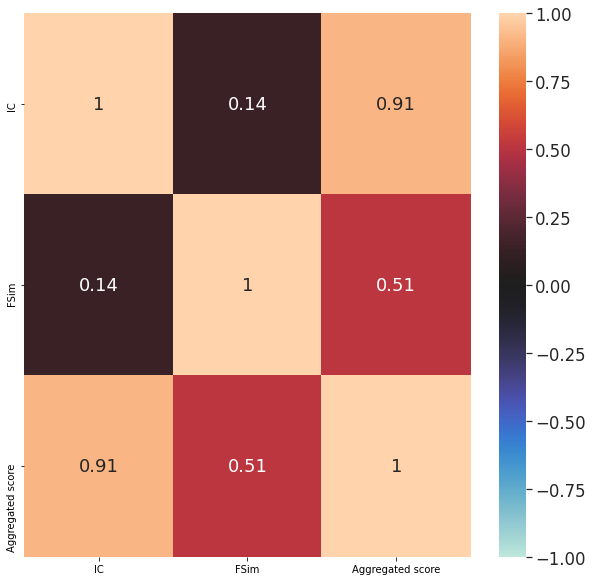

In [12]:
#correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.5)
ax = sns.heatmap(PPI_all_scores[['IC', 'FSim', 'Aggregated score']].corr(method ='pearson'), center = 0, vmin = -1, vmax = 1, annot = True)